# Load and plot results from eval script runs -- for the epsgreedy policy

In [56]:
from importlib import reload

import copy
import matplotlib.pyplot as plt
import pickle
import numpy as np

from pprint import pprint


from adaptive_time import plot_utils
from adaptive_time import utils

plot_utils = reload(plot_utils)
utils = reload(utils)

In [2]:
utils.set_directory_in_project()

Changed working directory to /Users/szepi1991/Code/adaptive_time


'/Users/szepi1991/Code/adaptive_time'

## Load and Explore the Data

In [38]:
# Real evaluation experiment:

# This one had a bug that made us learn negatives of the returns.
# Also, somehow the policy ran longer with each episode (5 episodes),
# which is pretty weird, so let's investigate.
# Returns:
    #  array([[  613.10681487,            nan],
    #         [ 3676.46521699,            nan],
    #         [ 4190.88549659,            nan],
    #         [ 4217.92458901,            nan],
    #         [13405.73139645,            nan],
    #         [14643.92205911,            nan],
    #         [26862.68952998,            nan]])
res_file_path = "exp_results/20240304-140348_u1_eval/exp_data.pkl"


# As above, but with bug fixed and more episodes to see if it's a fluke.
# Returns per episode do go down, so either we are good, or we are
# accidentally learning a good policy too just collapse. Rets per episode:
# array([  613.10681487,  3676.46521699,  4190.88549659,  4217.92458901,
#        13405.73139645, 14643.92205911, 26862.68952998, 20614.89171232,
#         2600.33660877])
res_file_path = "exp_results/20240304-144311_u1_eval/exp_data.pkl"


# Try a higher epsilon for a lower performance + to see if we still get
# better over time.
res_file_path = "exp_results/20240304-145406_u1_eval/exp_data.pkl"


with open(res_file_path, "rb") as f:
    loaded = pickle.load(f)
    if "results" in loaded:
        results = loaded["results"]
        print("The config for these results was: ")
        pprint(loaded["config"])
        try:
            policy_prob = loaded["config"]["policy_to_evaluate"][2]
        except TypeError:
            policy_prob = None
    else:
        results = loaded
        policy_prob = None
        print("Could not find a config.")


The config for these results was: 
{'budget': 100000,
 'budget_type': <BudgetType.UPDATES: 2>,
 'do_weighing': True,
 'epsilon': 0.08,
 'fourier_order': 4,
 'gamma': 0.99999,
 'max_env_steps': None,
 'num_runs': 1,
 'policy_to_evaluate': None,
 'regularizer': 0.1,
 'save_limit': None,
 'seed': 13,
 'tau': 0.02,
 'termination_prob': 0,
 'weights_to_evaluate': 'cartpole_weights_20240227-102913_ret92516.44719752521.npy'}


In [39]:
results.keys()

dict_keys(['u1'])

In [40]:
_first_el = list(results.values())[0]
print("number of runs:", len(_first_el))

number of runs: 1


In [41]:
print("recorded stats:")
pprint(list(_first_el[0].keys()))

recorded stats:
['total_return',
 'total_pivots',
 'total_interactions',
 'num_episode',
 'returns_per_episode_q',
 'predicted_returns_q',
 'returns_per_episode_v',
 'predicted_returns_v',
 'all_weights',
 'first_actions',
 'all_mean_err_pivots',
 'all_max_err_pivots']


In [42]:
print("Numbers of episodes:")
max_episodes = 0
for name, runs_data in results.items():
    num_episodes = [len(run["returns_per_episode_v"]) for run in runs_data]
    max_episodes = max(max_episodes, max(num_episodes))
    print(f" * {name}: {num_episodes}")

Numbers of episodes:
 * u1: [389]


#### Detailed Exploration

In [43]:
first_value = list(results.values())[0][0]
pprint(list(first_value.keys()))

['total_return',
 'total_pivots',
 'total_interactions',
 'num_episode',
 'returns_per_episode_q',
 'predicted_returns_q',
 'returns_per_episode_v',
 'predicted_returns_v',
 'all_weights',
 'first_actions',
 'all_mean_err_pivots',
 'all_max_err_pivots']


In [44]:
pprint(np.stack(first_value["returns_per_episode_v"]))

array([1805.33501524,   86.37874658,   82.31688461,  638.3695668 ,
         85.23291127,   84.81148321,   84.61107601, 1247.06395438,
        482.59348912,  212.69928493,  126.41210712,   82.43775224,
        140.3570865 ,   90.93247044, 1196.82167308,   81.09650943,
         81.46990097,   80.20026186,  438.39426737,   82.31888358,
        457.18993266,   13.96007003,   77.44778608,  224.91420628,
         78.70633947,  139.38592866,   84.15020724,  481.02423077,
         80.63874168,   70.81081475,   78.50819911,   81.23975299,
        254.77421172,   96.84379913,   79.82218823,   76.84294393,
        125.77156528,  153.9122271 ,  566.38288445, 1378.25750699,
         78.79867939,  170.2047766 ,   72.75614578,  609.45101888,
         78.45923607,   85.70679876,   82.60926268,   83.08483313,
        146.3446122 ,   78.47149499, 1034.96911185,   82.11653254,
        176.83009971,   80.45018071,   83.48973321,   77.49955114,
         60.75602917,  220.07522479,   81.88571267,   80.99536

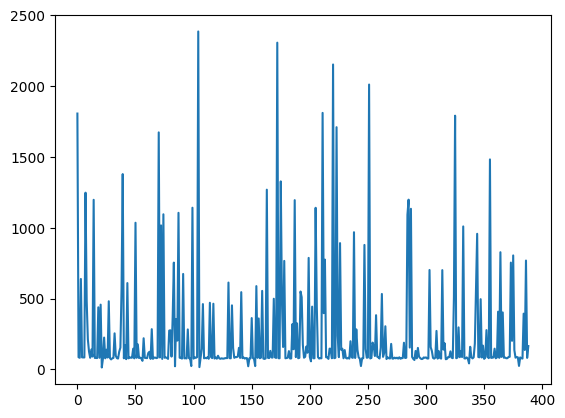

In [54]:
plt.plot(np.stack(first_value["returns_per_episode_v"]))

In [45]:
pprint(np.stack(first_value["predicted_returns_v"]))

array([1699.01960556,   17.29862996,   -8.88195344,   63.41442548,
         57.08930714,   35.48117217,   38.08726589,   68.97061666,
         90.82824266,   81.52594894,   68.07806079,   66.67258482,
         57.34941376,   55.91246172,   67.74579185,   67.18829516,
         62.61674311,   62.0105979 ,   77.2791222 ,   70.13573142,
         82.30382387,   75.9613999 ,   72.49006816,   76.09737399,
         72.56126261,   71.52350636,   66.12729247,   75.02215259,
         72.34935483,   69.26444599,   65.91474586,   65.3847728 ,
         68.51485662,   67.63399132,   67.29476833,   66.95814528,
         65.76020942,   65.93074346,   72.77468551,   75.48062223,
         74.84518768,   75.19740862,   74.83426595,   80.11579678,
         78.92247244,   77.30522768,   76.88965887,   77.0666035 ,
         76.96978421,   75.93755093,   77.43181199,   76.89136802,
         77.92533209,   77.66336011,   75.36646555,   75.22027339,
         73.89013697,   74.92548286,   74.27179852,   74.03326

In [46]:
pprint(np.stack(first_value["returns_per_episode_q"]))

array([[1805.33501524,           nan],
       [  86.37874658,           nan],
       [  82.31688461,           nan],
       [ 638.3695668 ,           nan],
       [          nan,   85.23291127],
       [  84.81148321,           nan],
       [  84.61107601,           nan],
       [1247.06395438,           nan],
       [ 482.59348912,           nan],
       [ 212.69928493,           nan],
       [ 126.41210712,           nan],
       [  82.43775224,           nan],
       [ 140.3570865 ,           nan],
       [  90.93247044,           nan],
       [1196.82167308,           nan],
       [  81.09650943,           nan],
       [  81.46990097,           nan],
       [  80.20026186,           nan],
       [ 438.39426737,           nan],
       [  82.31888358,           nan],
       [ 457.18993266,           nan],
       [  13.96007003,           nan],
       [  77.44778608,           nan],
       [ 224.91420628,           nan],
       [  78.70633947,           nan],
       [ 139.38592866,   

In [47]:
pprint(np.stack(first_value["predicted_returns_q"]))

array([[1699.01960556, 1560.00712916],
       [  17.29862996,  -35.21301881],
       [  -8.88195344,  -10.73428081],
       [  63.41442548,   35.3098907 ],
       [  55.57268316,   63.15580306],
       [  34.50236398,   40.37521313],
       [  37.82463301,   39.66306316],
       [  67.96858909,   75.98480968],
       [  90.77226582,   91.27605743],
       [  82.61043312,   71.76559133],
       [  69.71148061,   51.74386256],
       [  67.80247584,   54.24378351],
       [  58.63128395,   41.9669714 ],
       [  57.43506512,   36.11861752],
       [  69.20052543,   47.37952186],
       [  68.07683448,   53.86020545],
       [  63.57162054,   47.33870416],
       [  62.88706707,   47.11062199],
       [  78.06673406,   63.10210878],
       [  71.0508842 ,   52.74782865],
       [  83.07482371,   66.8838271 ],
       [  76.46410518,   65.40458895],
       [  72.85132648,   64.54238527],
       [  76.30965973,   71.21480191],
       [  72.89930642,   64.44821128],
       [  71.96775059,   

In [48]:
pprint(np.stack(first_value["predicted_returns_v"]))

array([1699.01960556,   17.29862996,   -8.88195344,   63.41442548,
         57.08930714,   35.48117217,   38.08726589,   68.97061666,
         90.82824266,   81.52594894,   68.07806079,   66.67258482,
         57.34941376,   55.91246172,   67.74579185,   67.18829516,
         62.61674311,   62.0105979 ,   77.2791222 ,   70.13573142,
         82.30382387,   75.9613999 ,   72.49006816,   76.09737399,
         72.56126261,   71.52350636,   66.12729247,   75.02215259,
         72.34935483,   69.26444599,   65.91474586,   65.3847728 ,
         68.51485662,   67.63399132,   67.29476833,   66.95814528,
         65.76020942,   65.93074346,   72.77468551,   75.48062223,
         74.84518768,   75.19740862,   74.83426595,   80.11579678,
         78.92247244,   77.30522768,   76.88965887,   77.0666035 ,
         76.96978421,   75.93755093,   77.43181199,   76.89136802,
         77.92533209,   77.66336011,   75.36646555,   75.22027339,
         73.89013697,   74.92548286,   74.27179852,   74.03326

## Plotting Code -- INSTRUCTIONS

By default we load the plotting code from `plot_utils.py`, but feel
free to overwrite these below.

In [57]:
plot_stuff = plot_utils.plot_stuff
default_plot_per_run_from_dict = plot_utils.default_plot_per_run_from_dict
default_plot_per_run_from_procdata = plot_utils.default_plot_per_run_from_procdata
default_plot_mean_from_proc_data = plot_utils.default_plot_mean_from_proc_data


def plot_stuff_with_errs(
      tuples_of_x_y_errs_labels_kwargs, title, ylabel, show):

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for x, y, yerr, label, kwargs in tuples_of_x_y_errs_labels_kwargs:
        plt.errorbar(x, y, yerr, label=label, **kwargs)

    plt.ylabel(ylabel, rotation=0, labelpad=40)
    plt.legend()

    if title is not None:
      plt.title(title)

    if show:
      plt.show()
    return ax



## Plots of Average Behaviour

In [61]:
pred_rets_data = plot_utils.process_across_runs(
        results, "total_pivots", "predicted_returns_v", right=np.nan)


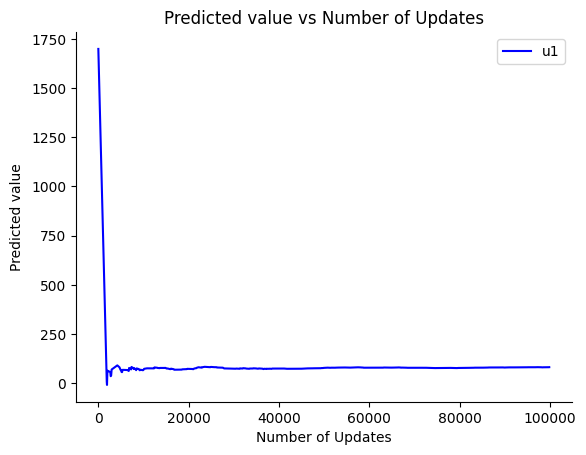

In [62]:

ax = default_plot_mean_from_proc_data(
    pred_rets_data, "Number of Updates", "Predicted value", show=False
)

min_x, max_x = ax.get_xlim()
# plt.hlines(
#     expected_return, 0, max_x,
#     colors='grey', linestyles='dashed',
#     label='True value')
ax.legend()
# ax.set_xlim(-100, 2000)
# ax.set_yscale('log')
plt.show()


**TODO** fix next block, for now disabled.

In [63]:
# _means = {
#     k: np.abs(val - expected_return)
#     for k, val in pred_rets_data.means.items()
# }
# error_data = pred_rets_data._replace(means=_means)

# ax = default_plot_mean_from_proc_data(
#     error_data, "Number of Updates", "|Pred V - $V_\pi$|",
#     title="Error vs Updates", show=False
# )

# # ax.set_xlim(-100, 2000)
# # ax.set_yscale('log')
# plt.show()

## Plots of individual runs

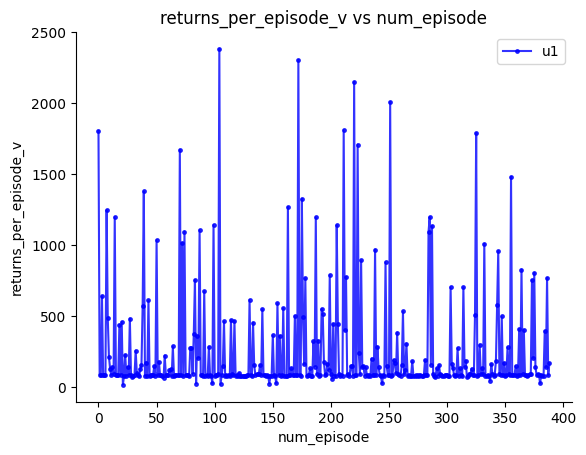

<Axes: title={'center': 'returns_per_episode_v vs num_episode'}, xlabel='num_episode', ylabel='returns_per_episode_v'>

In [64]:
default_plot_per_run_from_dict(
        results, x_label="num_episode", y_label="returns_per_episode_v")


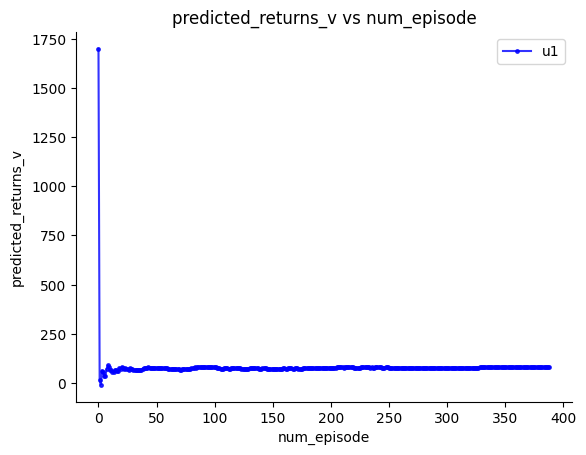

<Axes: title={'center': 'predicted_returns_v vs num_episode'}, xlabel='num_episode', ylabel='predicted_returns_v'>

In [65]:
default_plot_per_run_from_dict(
        results, x_label="num_episode", y_label="predicted_returns_v")


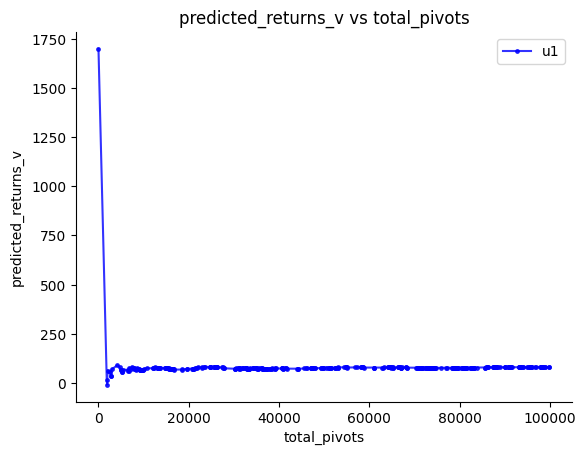

<Axes: title={'center': 'predicted_returns_v vs total_pivots'}, xlabel='total_pivots', ylabel='predicted_returns_v'>

In [66]:
default_plot_per_run_from_dict(
        results, x_label="total_pivots", y_label="predicted_returns_v")


## Compare Estimate and prediction for start state (indiv runs for now)


In [70]:
# Process empirical returns:
average_emp_rets = {}   # Should be indep of variant, run, etc
                        # but I guess it can give us a sense of variance.
for i, (name, all_seeds_data) in enumerate(results.items()):
    average_emp_rets[name] = []
    for seed_data in all_seeds_data:
        cum_avr = (
            np.cumsum(np.array(seed_data["returns_per_episode_v"]))
            / np.arange(1, len(seed_data["returns_per_episode_v"]) + 1))
        average_emp_rets[name].append(cum_avr)
        


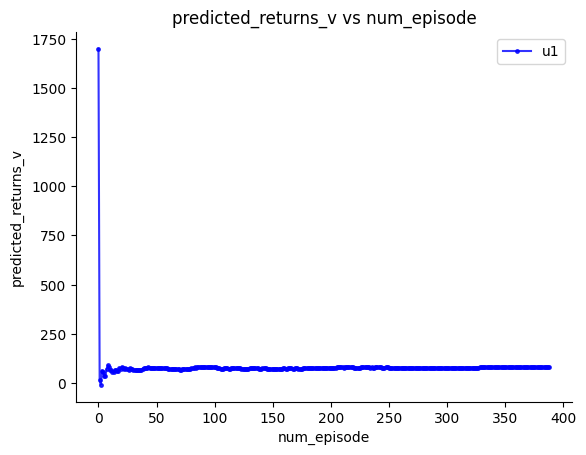

TypeError: plot_stuff() missing 1 required positional argument: 'show'

In [71]:
ax = default_plot_per_run_from_dict(
        results, x_label="num_episode", y_label="predicted_returns_v")

x_label = "num_episode"
y_label = "returns_per_episode_v"
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

tuples_of_x_y_labels_kwargs = []
for i, (name, all_seeds_data) in enumerate(average_emp_rets.items()):
    for run_idx in range(len(all_seeds_data)):
        seed_data = all_seeds_data[run_idx]
        length = len(seed_data)
        tuples_of_x_y_labels_kwargs.append((
            np.arange(length),
            seed_data,
            "Empirical est" if run_idx==0 else None,
            {"color": colors[i+1], "marker": "",
                "linestyle": "--", "markersize": 5,
                "alpha": 0.8}
        ))

ax = plot_stuff(tuples_of_x_y_labels_kwargs, False, ax=ax)
ax.set_ylabel("Return (pred vs true)", rotation=90, labelpad=5)
ax.set_title("Empirical vs predicted returns")
plt.show()
